## **1. MultiCollinearity:**
- It occurs when two or more independent variables are highly correlated with each other in case of regression model.
- **Multicollinearity may not affect the accuracy of the model to higher extent.**
- `But` we might lose reliability in determining the effects of individual independent features on the dependent feature in your model and that can be a problem when we want to interpret your model.

## **2. What causes MultiCollinearity:**
- **It could exist because of the problems in datasrt at the time of creation.** 
<br/>
*For example:* determining the electricity consumption of a household from the household income and the number of electrical appliances However, number of electrical appliances depends upon the household income. However, this cannot be removed from the dataset.

- **It can occur when we create a new feature using the existing features (in preprocessing/feature engineering)**
<br/>
*For example:* creating a variable for BMI from the height and weight variables. Though, BMI depends upon height and weight.

- **When same features are captured in different formats.**
<br/>
*For example:* including the weight of a person in kilograms and another for weight in grams or some other units.

## **3. Detecting MultiCollinearity:**
### 1. Using Correlation matrix and scatter plots: 
> It can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables.
<br/>

### 2. Using VIF: 
> VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

![img](https://miro.medium.com/freeze/max/385/1*lPyHIl8GlYoyfAd7ntAnnw.gif)

**Note:** 
- VIF can lies in b/w (1, +infinity)
- A VIF of 1 indicates that the feature has no correlation with any of the other features.
- Typically, a VIF value exceeding 5 or 10 is deemed to be too high.

## **4. Code Implementation**
- detect multicollinearity using `Variance Inflation Factor (VIF)`

### 4.1 Loading the libraries

In [121]:
"""Main"""
import os
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 50)

"""Visualization"""
import seaborn as sns
import matplotlib.pyplot as plt

"""Pre-processing"""
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection

"""Alogorithm"""
from sklearn import linear_model

### 4.2 Loading the data

In [2]:
cars = pd.read_csv("./inputs/car_sales.csv")
cars.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
cars = cars.dropna()
cars.isna().sum().sum()

0

### 4.3 Correlation Matrix

In [5]:
# Correlation Matrix: DataFrame
corr_matrix = cars.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

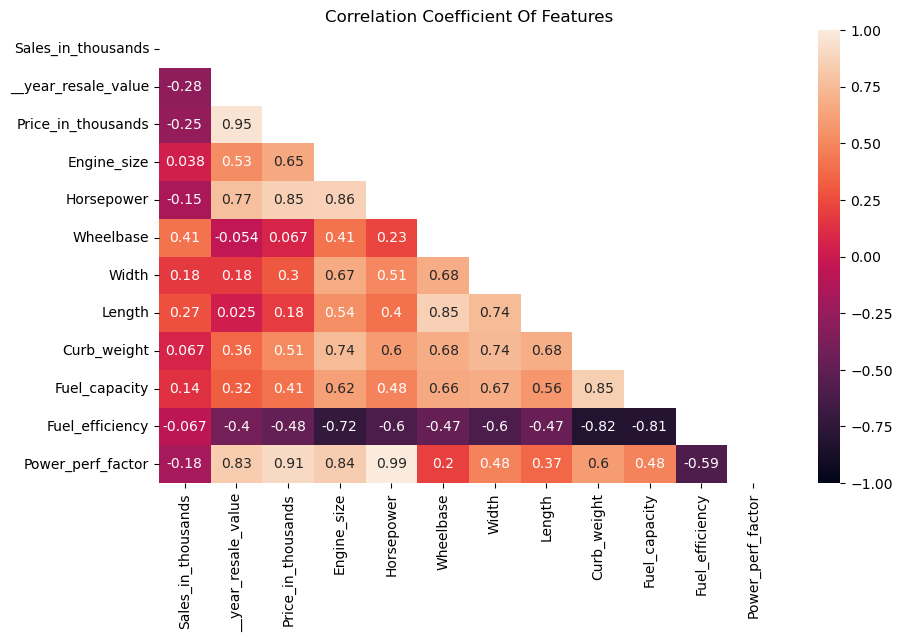

In [13]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.heatmap(data=corr_matrix, annot=True, ax=ax, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Features')
plt.show()

#### Conclusion:
From the HeatMap, we can identify the strong relationship between:
- Power_perf_factor and Horsepower
- Power_perf_factor and Engine_size
- Fuel_efficiency and Engine_size
- Fuel_efficiency and Curb_weight
- Fuel_efficiency and Fuel_capacity
----

### Note:
- What should we do next, shall we remove all these features to devlop our model. The Answer is **No** and the reason being that eliminating mall these features not only results in information loss but also impact the reliability of the model. 

### 4.2 Calculate VIF

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [8]:
def compute_vif(features, dataframe):
    # create the copy of the dataframe
    X = dataframe[features].copy()
    
    # the calculation of variance inflation requires a constant
    X["intercept"] = 1
    
    # create dataframe to store VIF values
    vif_df = pd.DataFrame()
    vif_df["variables"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(exog=X, exog_idx=col_idx) for col_idx in range(X.shape[1])]
    vif_df = vif_df[vif_df['variables']!='intercept']
    vif_df = vif_df.sort_values(by="VIF", ascending=False)
    return vif_df

In [49]:
cars.select_dtypes(include="number").columns

Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

In [53]:
# features to considered
features_to_considered = [
                          'Fuel_efficiency',
                          'Power_perf_factor',
                          'Engine_size',
                          'Horsepower',
                          'Fuel_capacity',
                          'Curb_weight'
                    ]

compute_vif(features=features_to_considered, dataframe=cars)  # VIF greater than 5 is considered too high

,variables,VIF
3,Horsepower,111.471081
1,Power_perf_factor,97.177100
2,Engine_size,6.721330
5,Curb_weight,5.353387
4,Fuel_capacity,4.282718
0,Fuel_efficiency,4.004185


### Concluison:
- Above, We can see here that the ‘Horsepower', 'Power_perf_factor', 'Engine_size' and even 'Curb_weight' have a high VIF value, meaning these features can be predicted by other independent features in the dataset. (High Collinearity).
- Again, the rookie mistake would be to remove all features at once. 
- **Feature selection is usually best performed by including or removing one feature at a time. This ensures that any information loss is minimized.**

**Let's start with removing Horsepower (i.e. the feature with the highest VIF)**

In [54]:
features_to_considered.remove("Horsepower")

compute_vif(features=features_to_considered, dataframe=cars)  # still some features having high VIF

,variables,VIF
2,Engine_size,5.208420
4,Curb_weight,5.200252
3,Fuel_capacity,4.281471
0,Fuel_efficiency,4.001535
1,Power_perf_factor,3.447764


In [55]:
features_to_considered.remove("Engine_size")  # Let's gain remove the highest one

compute_vif(features=features_to_considered, dataframe=cars)

,variables,VIF
3,Curb_weight,4.769113
2,Fuel_capacity,4.255820
0,Fuel_efficiency,3.787366
1,Power_perf_factor,1.675473


# **6. References:**

- Introduction to Multicollinearity in Data Science, [Refer here](https://www.analyticsvidhya.com/blog/2021/03/multicollinearity-in-data-science/)
- How to Targeting Multicollinearity in our dataset, [Refer here](https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b)

----